In [1]:
# import libraries needed
import pandas as pd
import numpy as np

import tldextract

import matplotlib.pyplot as plt
import seaborn as sns

import random

### Upvote based URL selection

In [2]:
def get_upvoted_URLs(df, n):
    df = df.sort_values(by="num_upvotes", ascending=False)
    df = df.reset_index()
    df_upvote = df[df.num_upvotes > 0]
    df_upvote_topn = df_upvote[:n]
    
    return df_upvote, df_upvote_topn

In [5]:
# Liberal data
lib_df = pd.read_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799.csv")
print(lib_df.shape)
lib_df_upvote, lib_df_upvote_top100 = get_upvoted_URLs(df=lib_df, n=100)
print(lib_df_upvote.shape)
lib_df_upvote.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_UpvotesOnly.csv")

(48605, 7)
(42940, 8)


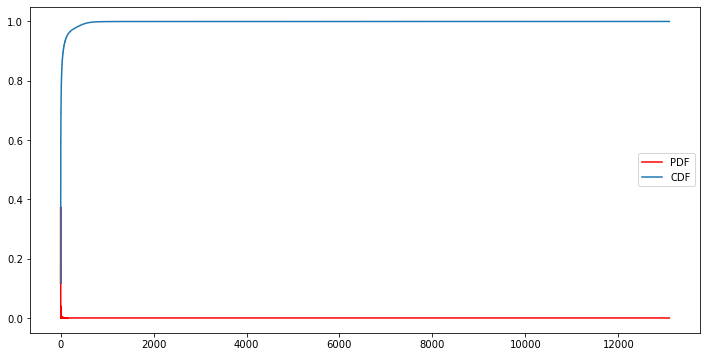

In [6]:
# plot CDF of upvotes
plt.figure(figsize=(12, 6))
count, bins_count = np.histogram(lib_df.num_upvotes.values, bins=len(lib_df.num_upvotes.values))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [7]:
# Conservative data
con_df = pd.read_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799.csv")
print(con_df.shape)
con_df_upvote, con_df_upvote_top100 = get_upvoted_URLs(df=con_df, n=100)
print(con_df_upvote.shape)
con_df_upvote.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_UpvotesOnly.csv")

(577388, 7)
(522523, 8)


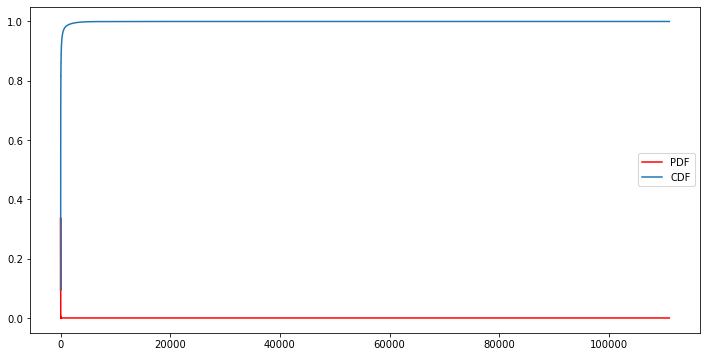

In [9]:
# plot CDF of upvotes
plt.figure(figsize=(12, 6))
count, bins_count = np.histogram(con_df.num_upvotes.values, bins=len(con_df.num_upvotes.values))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

### URL-domain based URL selection

In [10]:
def extract_domain(df):
    url_list = list(df.url)
    domain_list = []
    for URL in url_list:
        attributes = tldextract.extract(URL)
        domain_list.append(attributes.domain)

    domain_df = pd.DataFrame({ "url_domain" : domain_list })
    df_concat = pd.concat([df, domain_df], axis=1)

    return df_concat

def get_domain_ordered_URLs(df, n):
    # use groupby, count() and sort_values()
    df['Frequency'] = df.groupby('url_domain')['url_domain'].transform('count')
    df = df.sort_values('Frequency', ascending=False)
    df = df.reset_index()
    df_domainFreq_samplen = df.sample(n, random_state=42)
    df.reset_index(drop=True, inplace=True)
    
    return df, df_domainFreq_samplen

In [11]:
# Liberal data
lib_df = pd.read_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799.csv")
print(lib_df.shape)

lib_domain_df = extract_domain(lib_df)
print(lib_domain_df.shape)
print(lib_domain_df.head)
lib_domain_df.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainAdded.csv")

lib_df_domainFreq, lib_df_domainFreq_sample100 = get_domain_ordered_URLs(df=lib_domain_df, n=100)
print(lib_df_domainFreq.shape)
lib_df_domainFreq.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainFreqAdded.csv", index=False)

(48605, 7)
(48605, 8)
<bound method NDFrame.head of           ids                                                url  \
0       8le4t  http://mytinyspot.blogspot.com/2009/05/as-gop-...   
1       8l08o         http://www.youtube.com/watch?v=MG4FSCY9Luc   
2       8kneq         http://whohijackedourcountry.blogspot.com/   
3       8k0sf  http://www.rockridgeinstitute.org/research/roc...   
4       8jdfj         http://www.youtube.com/watch?v=nYpnB0ay_64   
...       ...                                                ...   
48600  otmwtj  https://www.reddit.com/r/Liberal/comments/otmw...   
48601  otmlff  https://www.reddit.com/r/Liberal/comments/otml...   
48602  otkzp2  https://www.reddit.com/r/Liberal/comments/otkz...   
48603  otk0tu  https://www.reddit.com/r/Liberal/comments/otk0...   
48604  otio9h  https://www.reddit.com/r/Liberal/comments/otio...   

        created_utc           author  num_upvotes  num_comments      flair  \
0      1.242680e+09       Screedname            0    

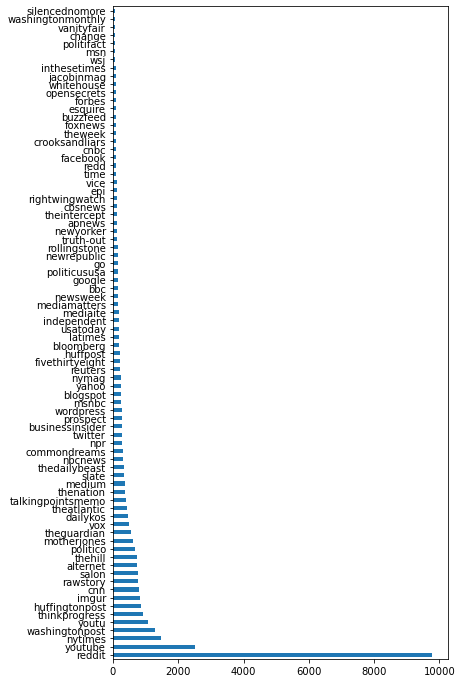

In [12]:
# plot lib url_domain distribution
# lib_df_domainFreq.url_domain.value_counts()[:100]
plt.figure(figsize=(6, 12))
lib_df_domainFreq.url_domain.value_counts()[:80].plot(kind='barh')
plt.show()

In [13]:
def remove_rows_w_col_vls(df, filters):
    # Get indexes where url_domain column has value filter
    for filter in filters:
        idxs = df[(df['url_domain'] == filter)].index
        # Delete these row indexes from dataFrame
        df.drop(idxs, inplace=True)
    
    return df

In [14]:
# Filter (remove youtube, youtu, imgur, redd, and twitter)

filters = ["youtube", "youtu", "imgur", "redd",  "twitter", "reddit", "facebook", "reddituploads", "redditmedia"]

lib_df_domainFreq_filtered = lib_df_domainFreq.copy()
print(lib_df_domainFreq_filtered.shape)
lib_df_domainFreq_filtered = remove_rows_w_col_vls(lib_df_domainFreq_filtered, filters)
print(lib_df_domainFreq_filtered.shape)
lib_df_domainFreq_filtered = lib_df_domainFreq_filtered.drop(columns=['index'])
lib_df_domainFreq_filtered.to_csv("../ids_urls_submission_Liberal_from_1241293173_to_1628308799_domainFreqAddedFiltered.csv", index=False)

(48605, 10)
(33851, 10)


In [15]:
# Conservative data
con_df = pd.read_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799.csv")
print(con_df.shape)

con_domain_df = extract_domain(con_df)
print(con_domain_df.shape)
print(con_domain_df.head)
con_domain_df.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainAdded.csv")

con_df_domainFreq, con_df_domainFreq_sample100 = get_domain_ordered_URLs(df=con_domain_df, n=100)
print(con_df_domainFreq.shape)
con_df_domainFreq.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainFreqAdded.csv", index=False)

(577388, 7)
(577388, 8)
<bound method NDFrame.head of            ids                                                url  \
0        68lfw  http://www.freerepublic.com/focus/f-news/19689...   
1        67npy  http://www.cbsnews.com/stories/2008/01/21/opin...   
2        67n8x               http://www.tsowell.com/speducat.html   
3        67n1u  http://whoisioz.blogspot.com/2008/01/searing-v...   
4        67n0j  http://www.becker-posner-blog.com/archives/200...   
...        ...                                                ...   
577383  oy14da  https://newsbreakforum.com/story/mexico-sues-r...   
577384  oy138v                       https://youtu.be/DVroxCPrm_Q   
577385  oy10ec                https://i.redd.it/uw1sk15fdef71.jpg   
577386  oy0zs8  https://www.reddit.com/r/Conservative/comments...   
577387  oy0zok        https://www.youtube.com/watch?v=LamRwl5Z2qk   

        created_utc         author  num_upvotes  num_comments flair  \
0        1202901623    unkorrupted            

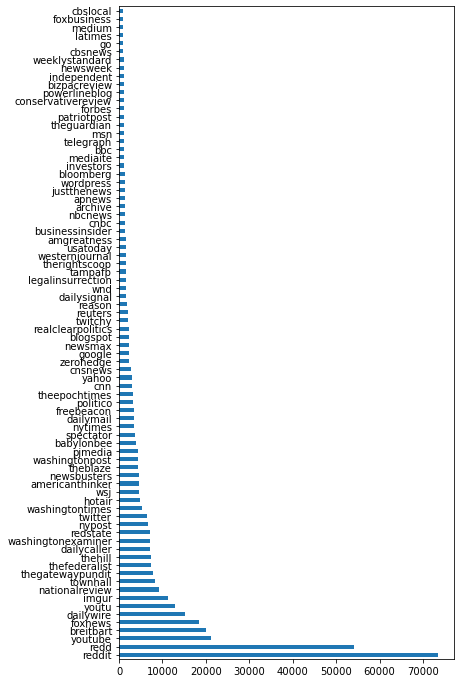

In [16]:
# plot conserv url_domain distribution
# con_df_domainFreq.url_domain.value_counts()[:100]
plt.figure(figsize=(6, 12))
con_df_domainFreq.url_domain.value_counts()[:80].plot(kind='barh')
plt.show()

In [17]:
# Filter (remove youtube, youtu, imgur, redd, and twitter)

con_df_domainFreq_filtered = con_df_domainFreq.copy()
print(con_df_domainFreq_filtered.shape)
con_df_domainFreq_filtered = remove_rows_w_col_vls(con_df_domainFreq_filtered, filters)
print(con_df_domainFreq_filtered.shape)
con_df_domainFreq_filtered = con_df_domainFreq_filtered.drop(columns=['index'])
con_df_domainFreq_filtered.to_csv("../ids_urls_submission_Conservative_from_1202154642_to_1628308799_domainFreqAddedFiltered.csv", index=False)

(577388, 10)
(397056, 10)


## Plots for the paper

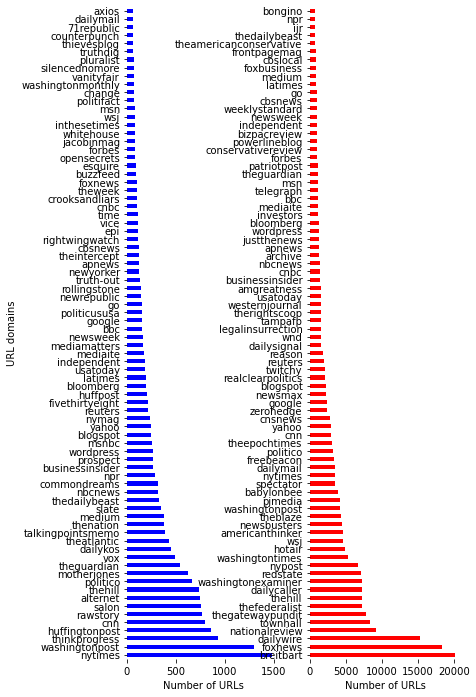

In [24]:
# Distribution of domains of the collected URLs

URL_dist = plt.figure(figsize=(6, 12))
plt.subplot(1,2,1)
ax=plt.gca()
# plot lib_df_domainFreq_filtered url_domain distribution
lib_df_domainFreq_filtered.url_domain.value_counts()[:80].plot(kind='barh', color="blue")
ax.set_frame_on(False)
plt.ylabel("URL domains")
plt.xlabel("Number of URLs")

plt.subplot(1,2,2)
ax=plt.gca()
# plot con_df_domainFreq_filtered url_domain distribution
con_df_domainFreq_filtered.url_domain.value_counts()[:80].plot(kind='barh', color="red")
ax.set_frame_on(False)
plt.xlabel("Number of URLs")

plt.show()
# URL_dist.savefig('../URL_dist.svg', format='svg', dpi=1200, bbox_inches='tight')

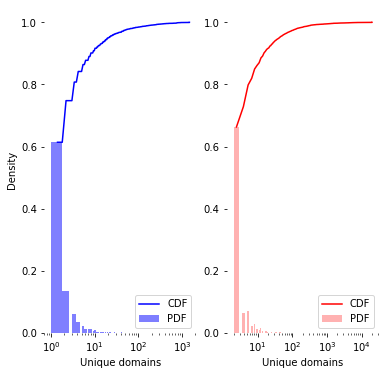

In [25]:
# PDF and CDF of domains of the collected URLs

# plot CDF of url_domain counts
URL_pdf_cdf = plt.figure(figsize=(6, 6))
plt.subplot(1,2,1)
ax=plt.gca()
count, bins_count = np.histogram(lib_df_domainFreq_filtered.url_domain.value_counts(), bins=len(lib_df_domainFreq_filtered.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.bar(bins_count[1:], pdf, color="blue", alpha=0.5, linestyle='dashed', label="PDF")
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")
plt.ylabel("Density")

# plot CDF of url_domain counts
plt.subplot(1,2,2)
ax=plt.gca()
count, bins_count = np.histogram(con_df_domainFreq_filtered.url_domain.value_counts(), bins=len(con_df_domainFreq_filtered.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting PDF and CDF
plt.bar(bins_count[1:], pdf, color="red", linestyle='dashed', alpha=0.3, label="PDF")
plt.plot(bins_count[1:], cdf, color="red", label="CDF")
plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")

plt.show()
# URL_pdf_cdf.savefig('../URL_pdf_cdf.svg', format='svg', dpi=1200, bbox_inches='tight')

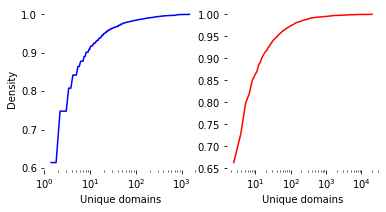

In [26]:
# CDF of domains of the collected URLs

# plot CDF of url_domain counts
URL_pdf_cdf = plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
ax=plt.gca()
count, bins_count = np.histogram(lib_df_domainFreq_filtered.url_domain.value_counts(), bins=len(lib_df_domainFreq_filtered.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting CDF
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
# plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")
plt.ylabel("Density")

# plot CDF of url_domain counts
plt.subplot(1,2,2)
ax=plt.gca()
count, bins_count = np.histogram(con_df_domainFreq_filtered.url_domain.value_counts(), bins=len(con_df_domainFreq_filtered.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting CDF
plt.plot(bins_count[1:], cdf, color="red", label="CDF")
# plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")

plt.show()
# URL_pdf_cdf.savefig('../URL_cdf.svg', format='svg', dpi=1200, bbox_inches='tight')

# Articles

In [186]:
# Liberal data
lib_all_df = pd.read_csv("../Lib_Articles_ALL.csv")
print(lib_all_df.shape)
print(lib_all_df.head())

# Remove rows without "aricles text" (i.e. NaN)
lib_all_df_filtered = lib_all_df.copy()
lib_all_df_filtered.dropna(subset=['articles'], inplace=True)
print(lib_all_df_filtered.shape)
lib_all_df_filtered.to_csv("../Lib_Articles_ALL_NaNremoved.csv", index=False)

# Order the data based on time
lib_all_df_filtered_natTime = lib_all_df_filtered.copy()
lib_all_df_filtered_natTime = lib_all_df_filtered_natTime.sort_values(by=['created_utc'], ascending=True, ignore_index=True)
print(lib_all_df_filtered_natTime.head())
print(lib_all_df_filtered_natTime.shape)
lib_all_df_filtered_natTime.to_csv("../Lib_Articles_ALL_NaNremoved_natTime.csv", index=False)

(36206, 10)
      ids                                               urls  \
0  3n4t00  http://www.nytimes.com/2015/10/01/opinion/gail...   
1  edd459  https://www.nytimes.com/2019/12/19/opinion/imp...   
2  3u38dh  http://www.nytimes.com/2015/11/25/opinion/repu...   
3  3nqfgt  http://krugman.blogs.nytimes.com/2015/10/06/tp...   
4  469tih  http://www.nytimes.com/2016/02/07/us/politics/...   

                                            articles   created_utc  \
0  Advertisement Supported by By Gail Collins Ten...  1.443724e+09   
1  Advertisement Supported by America’s defenders...  1.576863e+09   
2  Advertisement Supported by Editorial By The Ed...  1.448380e+09   
3  I’ve described myself as a lukewarm opponent o...  1.444154e+09   
4  Advertisement Supported by By Thomas Kaplan MA...  1.455730e+09   

       author  num_upvotes  num_comments flair url_domain  Frequency  
0  spaceghoti            2             0   NaN    nytimes       1483  
1  spaceghoti           11             6

In [187]:
# Converv data
Conserv_all_df = pd.read_csv("../Conserv_Articles_ALL.csv")
print(Conserv_all_df.shape)
print(Conserv_all_df.head())

# Remove rows without "aricles text" (i.e. NaN)
Conserv_all_df_filtered = Conserv_all_df.copy()
Conserv_all_df_filtered.dropna(subset=['articles'], inplace=True)
print(Conserv_all_df_filtered.shape)
Conserv_all_df_filtered.to_csv("../Conserv_Articles_ALL_NaNremoved.csv", index=False)

# Order the data based on time
Conserv_all_df_filtered_natTime = Conserv_all_df_filtered.copy()
Conserv_all_df_filtered_natTime = Conserv_all_df_filtered_natTime.sort_values(by=['created_utc'], ascending=True, ignore_index=True)
print(Conserv_all_df_filtered_natTime.head())
print(Conserv_all_df_filtered_natTime.shape)
Conserv_all_df_filtered_natTime.to_csv("../Conserv_Articles_ALL_NaNremoved_natTime.csv", index=False)

(425468, 10)
      ids                                               urls  \
0  578a8u  http://www.breitbart.com/2016-presidential-rac...   
1   spxpr  http://www.breitbart.com/Big-Government/2012/0...   
2  8b4lav  http://www.breitbart.com/london/2018/04/09/eu-...   
3  6e2e0g  http://www.breitbart.com/london/2017/05/16/1-i...   
4  gex3hn  https://www.breitbart.com/politics/2020/05/06/...   

                                            articles  created_utc  \
0  President Barack Obama ridiculed Republicans —...   1476298961   
1  The increasingly bitter and public shareholder...   1335273687   
2  European Commission President Jean-Claude Junc...   1523282820   
3  A new report from the London Borough of Redbri...   1496004711   
4  The Michigan House of Representatives and Sena...   1588797009   

               author  num_upvotes  num_comments flair url_domain  Frequency  
0           guanaco55            7             0   NaN  breitbart      20095  
1                 NaN        

In [296]:
# Last lib submission time 1628267640
# Last conserv submission time 1628581118
print(lib_all_df_filtered_natTime["created_utc"][29556])
print(Conserv_all_df_filtered_natTime["created_utc"])

1628267640.0
0         1202154685
1         1202154685
2         1202155211
3         1202158135
4         1202166269
             ...    
321265    1628574238
321266    1628574238
321267    1628574238
321268    1628574238
321269    1628581118
Name: created_utc, Length: 321270, dtype: int64


In [232]:
# Merge the articles from same post ids (they were split b4 due to large size of the article) 
def join_split_articles(df):
    df = df.groupby('ids', as_index=False).agg({'ids': pd.Series.mode, 'urls': pd.Series.mode, 'articles': [' '.join], "created_utc": pd.Series.mode, "author": pd.Series.mode, "num_upvotes": pd.Series.mode, "num_comments": pd.Series.mode, "flair": pd.Series.mode, "url_domain": pd.Series.mode, "Frequency": pd.Series.mode})
    df.columns = list(map("".join, df.columns.values))
    df.columns = ['ids','urls', 'articles', "created_utc", "author", "num_upvotes", "num_comments", "flair", "url_domain", "Frequency"]  
    df['created_utc'] = df['created_utc'].apply(np.int64)
    df = df.sort_values(by=['created_utc'], ascending=True, ignore_index=True)

    return df

lib_all_df_filtered_natTime_joined = join_split_articles(lib_all_df_filtered_natTime)
# print(lib_all_df_filtered_natTime_joined.head())
print(lib_all_df_filtered_natTime_joined.shape)
print(lib_all_df_filtered_natTime_joined.keys())


(27205, 10)
Index(['ids', 'urls', 'articles', 'created_utc', 'author', 'num_upvotes',
       'num_comments', 'flair', 'url_domain', 'Frequency'],
      dtype='object')


In [269]:
# Merge the articles from same post ids (they were split b4 due to large size of the article) 
def join_split_articles(df):
    df = df.groupby(['ids', 'urls', "created_utc"], as_index=False).agg({'ids': pd.Series.mode, 'urls': pd.Series.mode, 'articles': [' '.join], "created_utc": pd.Series.mode, "author": pd.Series.mode, "num_upvotes": pd.Series.mode, "num_comments": pd.Series.mode, "flair": pd.Series.mode, "url_domain": pd.Series.mode, "Frequency": pd.Series.mode})
    df.columns = list(map("".join, df.columns.values))
    df.columns = ['ids','urls', 'articles', "created_utc", "author", "num_upvotes", "num_comments", "flair", "url_domain", "Frequency"]  
    df['created_utc'] = df['created_utc'].apply(np.int64)
    df = df.sort_values(by=['created_utc'], ascending=True, ignore_index=True)

    return df

lib_all_df_filtered_natTime_joined_idURLS = join_split_articles(lib_all_df_filtered_natTime.copy())
# print(lib_all_df_filtered_natTime_joined.head())
print(lib_all_df_filtered_natTime_joined_idURLS.shape)
print(lib_all_df_filtered_natTime_joined_idURLS.keys())

Conserv_all_df_filtered_natTime_joined = join_split_articles(Conserv_all_df_filtered_natTime)
# print(Conserv_all_df_filtered_natTime_joined.head())
print(Conserv_all_df_filtered_natTime_joined.shape)
print(Conserv_all_df_filtered_natTime_joined.keys())

(27205, 10)
Index(['ids', 'urls', 'articles', 'created_utc', 'author', 'num_upvotes',
       'num_comments', 'flair', 'url_domain', 'Frequency'],
      dtype='object')


In [254]:
lib_all_df_filtered_natTime_joined.head()

,ids,urls,articles,created_utc,author,num_upvotes,num_comments,flair,url_domain,Frequency
0,8hchm,http://www.americamagazine.org/blog/entry.cfm?...,The news of Justice David Souter’s retirement ...,1241294002,ambroseburns,3,0,[],americamagazine,2
1,8he0a,http://scienceblogs.com/insolence/2009/05/what...,ScienceBlogs is where scientists communicate d...,1241313287,dangph,5,1,[],scienceblogs,5
2,8hkl8,http://fora.tv/2008/10/20/Naomi_Klein_and_Jose...,This domain is successfully pointed at WP Engi...,1241399228,elshizzo,4,0,[],fora,1
3,8io2p,http://www.theweek.com/article/index/96149/Vid...,Copyright © Dennis Publishing Limited 2021. Al...,1241717677,[],1,0,[],theweek,99
4,8k0sf,http://www.rockridgeinstitute.org/research/roc...,Let’s face it. Your goal is to go deer hunting...,1242187364,freedompower11,3,0,[],rockridgeinstitute,1


In [235]:
lib_all_df_filtered_natTime_joined[lib_all_df_filtered_natTime_joined['ids'] == 'jqtbt']

,ids,urls,articles,created_utc,author,num_upvotes,num_comments,flair,url_domain,Frequency
1007,jqtbt,http://weeklysift.com/2011/08/22/why-i-am-not-...,rred from this “capitalism is the only way” ap...,1314037291,dougmuder,8,0,[],weeklysift,39


In [270]:
# Merge the articles from same post ids (they were split b4 due to large size of the article) 
def join_split_articles(df):
    df = df.groupby(['ids', 'urls', "created_utc"], as_index=False).agg({'ids': pd.Series.mode, 'urls': pd.Series.mode, 'articles': [' '.join], "created_utc": pd.Series.mode, "author": pd.Series.mode, "num_upvotes": pd.Series.mode, "num_comments": pd.Series.mode, "flair": pd.Series.mode, "url_domain": pd.Series.mode, "Frequency": pd.Series.mode})
    df.columns = list(map("".join, df.columns.values))
    df.columns = ['ids','urls', 'articles', "created_utc", "author", "num_upvotes", "num_comments", "flair", "url_domain", "Frequency"]  
    df['created_utc'] = df['created_utc'].apply(np.int64)
    df = df.sort_values(by=['created_utc'], ascending=True, ignore_index=True)

    return df



(293446, 10)
Index(['ids', 'urls', 'articles', 'created_utc', 'author', 'num_upvotes',
       'num_comments', 'flair', 'url_domain', 'Frequency'],
      dtype='object')


In [271]:
Conserv_all_df_filtered_natTime_joined.head()

,ids,urls,articles,created_utc,author,num_upvotes,num_comments,flair,url_domain,Frequency
0,67n0j,http://www.becker-posner-blog.com/archives/200...,riors; no one will have fixed tenure. Compare ...,1202154685,[],1,0,[],becker-posner-blog,3
1,67n1u,http://whoisioz.blogspot.com/2008/01/searing-v...,Sign in with a different account Create accoun...,1202155211,[],1,0,[],blogspot,2256
2,67n8x,http://www.tsowell.com/speducat.html,THE EDUCATION OF MINORITY CHILDREN© by Thomas ...,1202158135,[],1,0,[],tsowell,3
3,67npy,http://www.cbsnews.com/stories/2008/01/21/opin...,Watch CBSN Live The page may have been removed...,1202166269,[],1,0,[],cbsnews,965
4,68lfw,http://www.freerepublic.com/focus/f-news/19689...,blic or its management. All materials posted h...,1202901623,unkorrupted,1,0,[],freerepublic,85


In [277]:
# Conserv_all_df_filtered_natTime_joined.index[Conserv_all_df_filtered_natTime_joined['ids']=="kg9guk"]
# # Conserv_all_df_filtered_natTime_joined.iloc[232831]['articles']

Int64Index([232831], dtype='int64')

In [259]:
# for idx, utc in enumerate(Conserv_all_df_filtered_natTime["created_utc"]):
#     if len(str(utc))>10:
#         print(idx, utc) # 1348064537

In [279]:
# and write the csv into JSON file
lib_all_df_filtered_natTime_joined.to_json('../Lib_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData.json', orient = 'split')
# and write the csv into JSON file
Conserv_all_df_filtered_natTime_joined.to_json('../Conserv_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData.json', orient = 'split')

### Remove Duplicate URLs

In [281]:
# Remove duplicate URLs (often posted by different User and has diff no of comments)
lib_all_dropDup = lib_all_df_filtered_natTime_joined.drop_duplicates(subset=['urls'], keep='first', ignore_index=True)
print(lib_all_dropDup.shape)
Conserv_all_dropDup = Conserv_all_df_filtered_natTime_joined.drop_duplicates(subset=['urls'], keep='first', ignore_index=True)
print(Conserv_all_dropDup.shape)

(26700, 10)
(280740, 10)


In [282]:
# and write the csv into JSON file
lib_all_dropDup.to_json('../Lib_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup.json', orient = 'split')
# and write the csv into JSON file
Conserv_all_dropDup.to_json('../Conserv_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup.json', orient = 'split')

### Remove Articles with error messages

In [340]:
lib_articles = lib_all_dropDup["articles"]
print(lib_articles.describe())
lib_all_dropDup_badArticle=lib_all_dropDup[lib_all_dropDup.duplicated(subset=['articles'], keep=False)]
print(lib_all_dropDup_badArticle.head())
print(lib_all_dropDup_badArticle.shape)
print(lib_all_dropDup_badArticle.iloc[0]["articles"])

count                                                 26700
unique                                                23538
top       Don't Sit on the Sidelines of History. Join Al...
freq                                                    654
Name: articles, dtype: object
     ids                                               urls  \
1  8he0a  http://scienceblogs.com/insolence/2009/05/what...   
2  8hkl8  http://fora.tv/2008/10/20/Naomi_Klein_and_Jose...   
6  8le4t  http://mytinyspot.blogspot.com/2009/05/as-gop-...   
8  8q7bj  http://mytinyspot.blogspot.com/2009/06/may-i-s...   
9  8retb  http://mytinyspot.blogspot.com/2009/06/south-c...   

                                            articles  created_utc      author  \
1  ScienceBlogs is where scientists communicate d...   1241313287      dangph   
2  This domain is successfully pointed at WP Engi...   1241399228    elshizzo   
6  Sorry, the blog at mytinyspot.blogspot.com has...   1242679600  Screedname   
8  Sorry, the blog at mytin

In [342]:
Conserv_articles = Conserv_all_dropDup["articles"]
print(Conserv_articles.describe())
Conserv_all_dropDup_badArticle=Conserv_all_dropDup[Conserv_all_dropDup.duplicated(subset=['articles'], keep=False)]
print(Conserv_all_dropDup_badArticle.head())
print(Conserv_all_dropDup_badArticle.shape)
print(Conserv_all_dropDup_badArticle.iloc[1]["articles"])

count                                                280740
unique                                               244482
top       WSJ Membership Customer Service Tools & Featur...
freq                                                   4415
Name: articles, dtype: object
     ids                                               urls  \
1  67n1u  http://whoisioz.blogspot.com/2008/01/searing-v...   
3  67npy  http://www.cbsnews.com/stories/2008/01/21/opin...   
5  6b1e5  http://www.lewrockwell.com/blog/lewrw/archives...   
6  6ytmt  http://westernfrontamerica.com/2008/08/29/teac...   
7  6zh0d  http://onlineapps.newsvine.com/_news/2008/09/0...   

                                            articles  created_utc     author  \
1  Sign in with a different account Create accoun...   1202155211         []   
3  Watch CBSN Live The page may have been removed...   1202166269         []   
5  LRC Blog https://www.lewrockwell.com/lrc-blog/...   1204771138         []   
6            © HugeDomains.com.

In [344]:
# Remove all the duplicates
lib_all_dropDup_DUPnbadArticle = lib_all_dropDup.copy()
lib_all_dropDup_DUPnbadArticle = lib_all_dropDup_DUPnbadArticle.drop_duplicates(subset=['articles'], keep=False)
print(lib_all_dropDup_DUPnbadArticle.shape)

Conserv_all_dropDup_DUPnbadArticle = Conserv_all_dropDup.copy()
Conserv_all_dropDup_DUPnbadArticle = Conserv_all_dropDup_DUPnbadArticle.drop_duplicates(subset=['articles'], keep=False)
print(Conserv_all_dropDup_DUPnbadArticle.shape)

(23065, 10)
(238211, 10)


In [345]:
# and write the csv into JSON file
lib_all_dropDup_DUPnbadArticle.to_json('../Lib_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle.json', orient = 'split')
# and write the csv into JSON file
Conserv_all_dropDup_DUPnbadArticle.to_json('../Conserv_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle.json', orient = 'split')

### ADD missed articles the above 2 files ### IMPORTANT

In [414]:
missed2013_lib_data = pd.read_json('/home/ravi/missed_reddit_scrape_URLs/Lib_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle.json', orient = 'split')
print(missed2013_lib_data.shape)
missed2013_Conserv_data = pd.read_json('/home/ravi/missed_reddit_scrape_URLs/Conserv_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle.json', orient = 'split')
print(missed2013_Conserv_data.shape)

(1996, 10)
(16109, 10)


In [415]:
lib_all_dropDup_DUPnbadArticle_MissAdded = pd.concat([lib_all_dropDup_DUPnbadArticle, missed2013_lib_data], ignore_index=True, sort=False)
print(lib_all_dropDup_DUPnbadArticle_MissAdded.shape)
Conserv_all_dropDup_DUPnbadArticle_MissAdded = pd.concat([Conserv_all_dropDup_DUPnbadArticle, missed2013_Conserv_data], ignore_index=True, sort=False)
print(Conserv_all_dropDup_DUPnbadArticle_MissAdded.shape)

(25061, 10)
(254320, 10)


In [416]:
# sort ascend from 2008 to 2021
lib_all_dropDup_DUPnbadArticle_MissAdded = lib_all_dropDup_DUPnbadArticle_MissAdded.sort_values(by=['created_utc'], ascending=True, ignore_index=True)
Conserv_all_dropDup_DUPnbadArticle_MissAdded = Conserv_all_dropDup_DUPnbadArticle_MissAdded.sort_values(by=['created_utc'], ascending=True, ignore_index=True)

In [418]:
# and write the new JSON file
lib_all_dropDup_DUPnbadArticle_MissAdded.to_json('../Lib_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle_MissAdded.json', orient = 'split')
# and write the new JSON file
Conserv_all_dropDup_DUPnbadArticle_MissAdded.to_json('../Conserv_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle_MissAdded.json', orient = 'split')

### Remove Articles with short text

In [419]:
cddf = Conserv_all_dropDup_DUPnbadArticle_MissAdded.copy()
carticles = cddf["articles"]
print(carticles.describe())

cddf['totalwords'] = [len(x.split()) for x in cddf['articles'].tolist()]
# print(ddf.head())
print(cddf['totalwords'].describe([.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99]))

count                                                254320
unique                                               254225
top       Type at least three characters to start auto c...
freq                                                      2
Name: articles, dtype: object
count    2.543200e+05
mean     1.053909e+03
std      4.228607e+04
min      1.000000e+00
1%       2.000000e+00
5%       2.000000e+00
10%      2.700000e+01
20%      2.240000e+02
30%      3.460000e+02
40%      4.430000e+02
50%      5.490000e+02
60%      6.730000e+02
70%      8.310000e+02
80%      1.054000e+03
90%      1.535000e+03
95%      2.291000e+03
96%      2.612000e+03
97%      3.181000e+03
98%      4.250240e+03
99%      7.296000e+03
max      1.997745e+07
Name: totalwords, dtype: float64


In [420]:
ddf = lib_all_dropDup_DUPnbadArticle_MissAdded.copy()
articles = ddf["articles"]
print(articles.describe())

ddf['totalwords'] = [len(x.split()) for x in ddf['articles'].tolist()]
# print(ddf.head())
print(ddf['totalwords'].describe([.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.96,.97,.98,.99]))

count                                                 25061
unique                                                25043
top       We couldn't find the page you were looking for...
freq                                                      2
Name: articles, dtype: object
count    2.506100e+04
mean     1.490366e+03
std      8.430051e+03
min      1.000000e+00
1%       1.000000e+01
5%       4.900000e+01
10%      1.710000e+02
20%      3.740000e+02
30%      5.180000e+02
40%      6.620000e+02
50%      8.130000e+02
60%      9.570000e+02
70%      1.157000e+03
80%      1.446000e+03
90%      2.197000e+03
95%      3.718000e+03
96%      4.435600e+03
97%      5.484600e+03
98%      7.372600e+03
99%      1.178620e+04
max      1.013911e+06
Name: totalwords, dtype: float64


In [421]:

print("remove words <=15")
ddf_drop15 = ddf[ddf['totalwords'] <= 15]
print(ddf_drop15.shape)
print(ddf_drop15['totalwords'].describe())
print(ddf_drop15.iloc[524]["articles"])
ddf_above15 = ddf[ddf['totalwords'] > 15]

print("remove words <=50")
ddf_drop50 = ddf_above15[ddf_above15['totalwords'] <= 50]
print(ddf_drop50.shape)
print(ddf_drop50['totalwords'].describe())
print(ddf_drop50.iloc[500]["articles"])
ddf_above50 = ddf_above15[ddf_above15['totalwords'] > 50]

print("remove words <=100")
ddf_drop100 = ddf_above50[ddf_above50['totalwords'] <= 100]
print(ddf_drop100.shape)
print(ddf_drop100['totalwords'].describe())
print(ddf_drop100.iloc[600]["articles"])
ddf_above100 = ddf_above50[ddf_above50['totalwords'] > 100]

remove words <=15
(618, 11)
count    618.000000
mean       7.966019
std        4.000463
min        1.000000
25%        3.000000
50%       10.000000
75%       10.000000
max       15.000000
Name: totalwords, dtype: float64
found @ 24 likes ON 2018-04-13 19:44:35 BY ME.ME
remove words <=50
(657, 11)
count    657.000000
mean      32.042618
std        9.315180
min       16.000000
25%       25.000000
50%       31.000000
75%       39.000000
max       50.000000
Name: totalwords, dtype: float64
A version of this action that uses less javascript and may be usable for those who don't use javascript is available at https://actionnetwork.org/event_campaigns/elpasofirme-a-call-to-action-against-white-supremacy?nowrapper=true&referrer=&source=&oneclick=
remove words <=100
(639, 11)
count    639.000000
mean      70.633803
std       13.663460
min       51.000000
25%       59.000000
50%       68.000000
75%       81.000000
max      100.000000
Name: totalwords, dtype: float64
By Maegan Vazquez, CNN Update

In [422]:
print("remove words <=300")
ddf_drop300 = ddf_above100[ddf_above100['totalwords'] <= 300]
print(ddf_drop300.shape)
print(ddf_drop300['totalwords'].describe())
print(ddf_drop300.iloc[600]["articles"])
ddf_above300 = ddf_above100[ddf_above100['totalwords'] > 300]

remove words <=300
(1947, 11)
count    1947.000000
mean      209.478685
std        60.449634
min       101.000000
25%       161.000000
50%       218.000000
75%       263.000000
max       300.000000
Name: totalwords, dtype: float64
By LAUREN FRENCH 01/13/2015 10:32 AM EST Updated 01/13/2015 04:12 PM EST Minority Leader Nancy Pelosi announced in a closed-door meeting Tuesday she would name the first Muslim lawmaker to the House’s Permanent Select Committee on Intelligence. A senior Democratic aide said Rep. André Carson of Indiana would be named in the “coming days” to the key national security-focused panel. Pelosi (D-Calif.) told lawmakers of the appointment during the members’ weekly caucus meeting. Carson would be the first Muslim to serve on the committee and was the second Muslim to be elected to Congress. He already serves on the Armed Services Committee and worked for the Department of Homeland Security’s Fusion Center — the clearinghouse established by the federal government to 

## Analysis and Final Plots

### Plot 1: CDF ========> url_domain.value_counts() make sure to check it

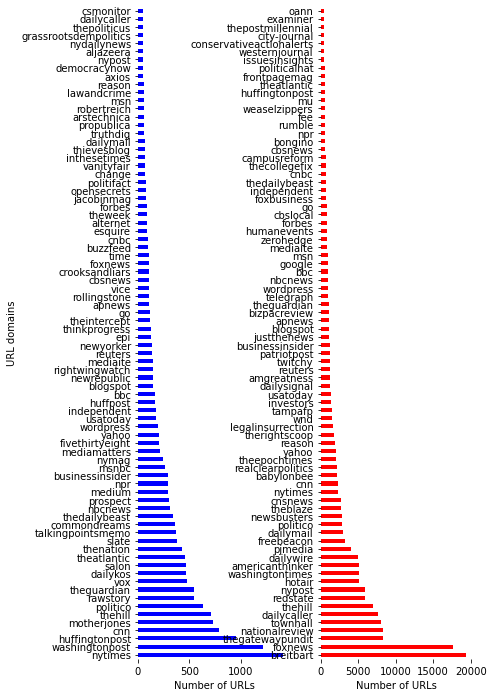

In [423]:
# Distribution of domains of the collected URLs

lib_data = pd.read_json('../Lib_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle_MissAdded.json', orient = 'split')
Conserv_data = pd.read_json('../Conserv_ALL_ArticlesNoSplit_NaNremoved_natTime_OriginalData_dropDup_DUPnbadArticle_MissAdded.json', orient = 'split')

URL_dist = plt.figure(figsize=(6, 12))
plt.subplot(1,2,1)
ax=plt.gca()
# plot lib_df_domainFreq_filtered url_domain distribution
lib_data.url_domain.value_counts()[:80].plot(kind='barh', color="blue")
ax.set_frame_on(False)
plt.ylabel("URL domains")
plt.xlabel("Number of URLs")

plt.subplot(1,2,2)
ax=plt.gca()
# plot con_df_domainFreq_filtered url_domain distribution
Conserv_data.url_domain.value_counts()[:80].plot(kind='barh', color="red")
ax.set_frame_on(False)
plt.xlabel("Number of URLs")

plt.show()
URL_dist.savefig('../Articles_URL_dist.svg', format='svg', dpi=1200, bbox_inches='tight')

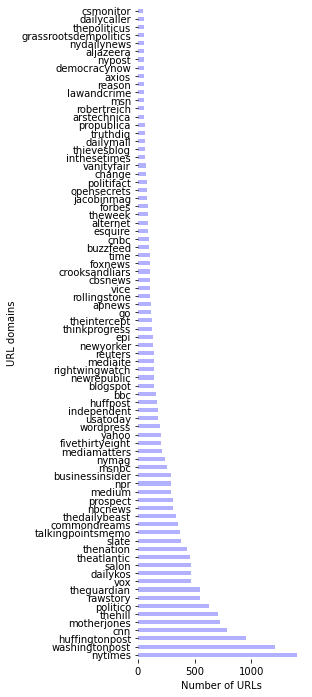

In [424]:
# Distribution of domains of the collected URLs

URL_dist = plt.figure(figsize=(3, 12))
ax=plt.gca()
# plot lib_df_domainFreq_filtered url_domain distribution
lib_data.url_domain.value_counts()[:80].plot(kind='barh', alpha=0.3, color="blue")
ax.set_frame_on(False)
plt.ylabel("URL domains")
plt.xlabel("Number of URLs")


plt.show()
URL_dist.savefig('../Lib_Articles_URL_dist.svg', format='svg', dpi=1200, bbox_inches='tight')

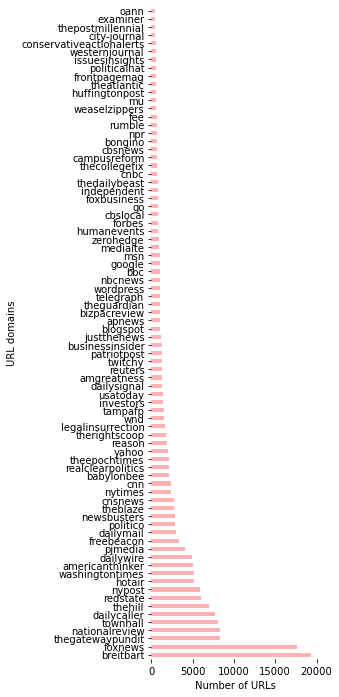

In [425]:
# Distribution of domains of the collected URLs

URL_dist = plt.figure(figsize=(3, 12))

ax=plt.gca()
# plot con_df_domainFreq_filtered url_domain distribution
Conserv_data.url_domain.value_counts()[:80].plot(kind='barh', alpha=0.3, color="red")
ax.set_frame_on(False)
plt.ylabel("URL domains")
plt.xlabel("Number of URLs")

plt.show()
URL_dist.savefig('../Conserv_Articles_URL_dist.svg', format='svg', dpi=1200, bbox_inches='tight')

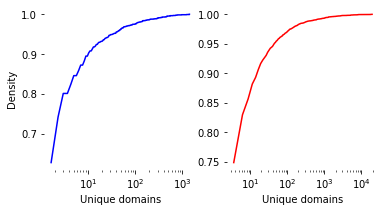

In [426]:
# CDF of domains of the collected URLs

# plot CDF of url_domain counts
URL_pdf_cdf = plt.figure(figsize=(6, 3))
plt.subplot(1,2,1)
ax=plt.gca()
count, bins_count = np.histogram(lib_data.url_domain.value_counts(), bins=len(lib_data.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting CDF
plt.plot(bins_count[1:], cdf, color="blue", label="CDF")
# plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")
plt.ylabel("Density")

# plot CDF of url_domain counts
plt.subplot(1,2,2)
ax=plt.gca()
count, bins_count = np.histogram(Conserv_data.url_domain.value_counts(), bins=len(Conserv_data.url_domain.value_counts()))
# finding the PDF of the histogram using count values
pdf = count / sum(count)
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
# plotting CDF
plt.plot(bins_count[1:], cdf, color="red", label="CDF")
# plt.legend()
ax.set_frame_on(False)
ax.set_xscale('log')
plt.xlabel("Unique domains")

plt.show()
URL_pdf_cdf.savefig('../Articles_URL_cdf.svg', format='svg', dpi=1200, bbox_inches='tight')

### Plot 2: No of Articles per Day

In [427]:
# Plot No. of articles per day over the beginning to 8/10/2021, 3:38:38 AM
from datetime import date

def get_date_freq(utc_df):
    date_df = pd.to_datetime(utc_df, unit='s')
    year = pd.DataFrame(date_df.dt.year).astype(str)
    month = pd.DataFrame(date_df.dt.month).astype(str)
    day = pd.DataFrame(date_df.dt.day).astype(str)
    df = year + "-" + month + "-" + day
    df['Frequency'] = df.groupby('created_utc')['created_utc'].transform('count')
    
    return df 

def get_no_of_artcles_per_day(all_dates_ArtcileCount, lib_date_freq, Conserv_date_freq):
    
    for (index, row_series) in all_dates_ArtcileCount.iterrows():  
                
        if sum(lib_date_freq['created_utc'] == row_series['date'])>0: #lib_date_freq['created_utc'].str.contains(row_series['date']).any():      
            all_dates_ArtcileCount.at[index,'lib_article_count'] = lib_date_freq.loc[lib_date_freq['created_utc'] == row_series['date'], 'Frequency'].iloc[0]   
            
        if sum(Conserv_date_freq['created_utc'] == row_series['date'])>0: #Conserv_date_freq['created_utc'].str.contains(row_series['date']).any(): 
            all_dates_ArtcileCount.at[index,'Conserv_article_count'] = Conserv_date_freq.loc[Conserv_date_freq['created_utc'] == row_series['date'], 'Frequency'].iloc[0]

    return all_dates_ArtcileCount

lib_date_freq = get_date_freq(lib_data["created_utc"])
Conserv_date_freq = get_date_freq(Conserv_data["created_utc"])

sdate = date(2008,2,4)   # start dateor date of the first post on r/conserv
edate = date(2021,8,10)   # end date 8/10/2021, 3:38:38 AM
all_dates_ArtcileCount = pd.date_range(sdate,edate,freq='d')
all_dates_ArtcileCount = pd.DataFrame(all_dates_ArtcileCount.strftime('%Y-%-m-%-d'), columns=["date"])
all_dates_ArtcileCount["lib_article_count"] = 0
all_dates_ArtcileCount["Conserv_article_count"] = 0
print(all_dates_ArtcileCount)

print(lib_date_freq)
print(Conserv_date_freq)

no_of_artcles_per_day = get_no_of_artcles_per_day(all_dates_ArtcileCount, lib_date_freq, Conserv_date_freq)
print(no_of_artcles_per_day)

           date  lib_article_count  Conserv_article_count
0      2008-2-4                  0                      0
1      2008-2-5                  0                      0
2      2008-2-6                  0                      0
3      2008-2-7                  0                      0
4      2008-2-8                  0                      0
...         ...                ...                    ...
4932   2021-8-6                  0                      0
4933   2021-8-7                  0                      0
4934   2021-8-8                  0                      0
4935   2021-8-9                  0                      0
4936  2021-8-10                  0                      0

[4937 rows x 3 columns]
      created_utc  Frequency
0        2009-5-2          1
1        2009-5-7          1
2       2009-5-13          1
3       2009-5-15          1
4        2009-6-3          1
...           ...        ...
25056    2021-8-6         13
25057    2021-8-6         13
25058    2021-8-6 

In [428]:
URL_pdf_cdf = plt.figure(figsize=(18, 3))
plt.plot(no_of_artcles_per_day['lib_article_count'],  alpha=0.5, color="blue")
no_of_artcles_per_day.plot(
print(sum(no_of_artcles_per_day['lib_article_count']))
plt.plot(no_of_artcles_per_day['Conserv_article_count'],  alpha=0.5, color="red")
print(sum(no_of_artcles_per_day['Conserv_article_count']))
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

SyntaxError: invalid syntax (480088910.py, line 5)

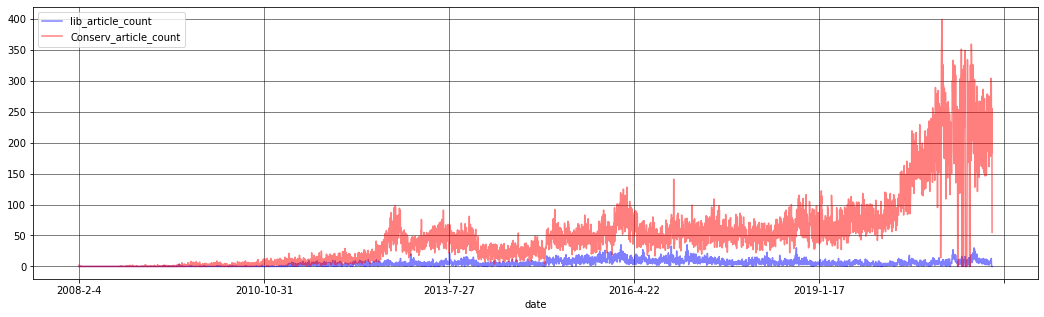

In [429]:
no_of_artcles_per_day.plot(x="date", y=["lib_article_count", "Conserv_article_count"], figsize=(18,5), grid=True,
                          alpha=0.5, color=["blue", 'red'])
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')

### Plot 3: Word statistics

count                                                 26700
unique                                                23538
top       Don't Sit on the Sidelines of History. Join Al...
freq                                                    654
Name: articles, dtype: object

,ids,urls,articles,created_utc,author,num_upvotes,num_comments,flair,url_domain,Frequency
1,8he0a,http://scienceblogs.com/insolence/2009/05/what...,ScienceBlogs is where scientists communicate d...,1241313287,dangph,5,1,[],scienceblogs,5
2,8hkl8,http://fora.tv/2008/10/20/Naomi_Klein_and_Jose...,This domain is successfully pointed at WP Engi...,1241399228,elshizzo,4,0,[],fora,1
6,8le4t,http://mytinyspot.blogspot.com/2009/05/as-gop-...,"Sorry, the blog at mytinyspot.blogspot.com has...",1242679600,Screedname,0,1,[],blogspot,251
8,8q7bj,http://mytinyspot.blogspot.com/2009/06/may-i-s...,"Sorry, the blog at mytinyspot.blogspot.com has...",1244250103,Screedname,2,0,[],blogspot,251
9,8retb,http://mytinyspot.blogspot.com/2009/06/south-c...,"Sorry, the blog at mytinyspot.blogspot.com has...",1244654026,Screedname,0,0,[],blogspot,251


"Sorry, the blog at mytinyspot.blogspot.com has been removed. This address is not available for new blogs. Did you expect to see your blog here? See: 'I can't find my blog on the Web, where is it?'"